In [133]:
!pip install requests
!pip install -U matplotlib
!pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

Requirement already up-to-date: matplotlib in ./scrapingVenv/lib/python3.7/site-packages (3.2.1)
     |████████████████████████████████| 28.4 MB 9.6 MB/s eta 0:00:01     |████████████████▉               | 15.0 MB 3.0 MB/s eta 0:00:05     |███████████████████             | 16.8 MB 3.0 MB/s eta 0:00:04     |█████████████████████████▏      | 22.3 MB 6.5 MB/s eta 0:00:01     |█████████████████████████████▍  | 26.1 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 9.3 MB/s eta 0:00:01    |█████▍                          | 1.7 MB 2.6 MB/s eta 0:00:04     |█████████▍                      | 2.9 MB 2.6 MB/s eta 0:00:03
     |████████████████████████████████| 5.6 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 4.7 MB/s eta 0:00:01
     |█████████████

  Created wheel for mpmath: filename=mpmath-1.1.0-py3-none-any.whl size=532239 sha256=9d485d231da73bfbaafa0f0283e30fb6e365b356b8f70b1c23c8b9c220bc4f95
  Stored in directory: /Users/luis/Library/Caches/pip/wheels/e2/46/78/e78f76c356bca9277368f1f97a31b37a8cb937176d9511af31
Successfully built mpmath


In [135]:
import requests
import re
import webbrowser
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
url = 'https://lista.mercadolivre.com.br/veiculos/motos/naked/yamaha/mt-09/'

In [179]:
resp = requests.get(url)

In [180]:
soup = BeautifulSoup(resp.text, 'lxml')

In [194]:
bike_dict = {}
find_price = soup.find_all('span', {'class': 'price__fraction'})
find_year_and_km = soup.find_all('div', {'class': 'item__attrs'})

In [200]:
for price, year in zip(find_price, find_year_and_km):
    year_formated = year.text.replace(' ', '')[:4]
    price_formated = price.text.replace('.', '')
    bike_dict[year_formated] = int(price_formated)

In [201]:
bike_dict = {key: value for key, value in 
                 sorted(bike_dict.items(), key= lambda item: item[1])
            }

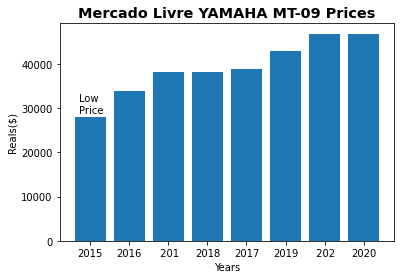

In [213]:
plt.bar(range(len(bike_dict)), list(bike_dict.values()), align='center')
plt.xticks(range(len(bike_dict)), list(bike_dict.keys()))

plt.title('Mercado Livre YAMAHA MT-09 Prices', fontdict={
    'size': 'x-large',
    'weight': 'bold',
});
plt.ylabel('Reals($)');
plt.xlabel('Years');
plt.text(-0.3, 29000, 'Low\nPrice');

plt.show()